## Installing Required Python Packages

Note: run the following cell once. 

In [1]:
# !pip install -r requirements.txt

## Importing essential Python Packages

In [2]:
import os, sys

import numpy as np
from scipy.linalg import eigh
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import scipy.linalg as sla
import pandas as pd
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import optimize
from scipy.optimize import minimize
from astropy.io import fits
from astropy import wcs
from matplotlib import cm
import pickle
from matplotlib.colors import LogNorm
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
import matplotlib.image as img
import warnings
warnings.filterwarnings('ignore')

# %matplotlib notebook
# %matplotlib notebook

`sbfTools` hold all the auxiliary functions we use in this notebook.
Make sure that `sbfTools.py` is in located in the same folder as this notebook.

In [3]:
# make sure 
from sbfTools import *

In [4]:
#https://math.stackexchange.com/questions/1114879/detect-if-two-ellipses-intersect

## Object Initialization

In [5]:
## This is the folder that holds recent observations by wfc3 on HST in a SNAP program

inFolder = '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/wfc3-16262/'
configFolder = '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/config/'


# Input

### Object Name

In [6]:
name = "u03396"

### Do NOT change the following cells

unless there are some naming issues, and the files are in other locations
other than what has been set up autoamtically. 

In [7]:
inFolder = inFolder + '/'
config   = configFolder + '/'

outFolder = "Outputs_"+name+'/'
logFile = outFolder+name+"_model_log.csv"


In [8]:
if exists(logFile):
    with open(logFile, 'r') as f:
        line = f.readline()

    if line.strip("#").strip()[:4] == "uuid":
        old_uuid = line.strip("#").split(":")[1].strip()                   
        if os.path.isdir(outFolder+name+"_"+old_uuid):
            uuid = old_uuid
            params = get_obj_params(open_log_df(logFile))

else:
    print("There is no log-file. \nPlease run elliprof to generate the log file and the relevant plots.")
    print("Elliprof notebook name: \"Run_elliprof_function.ipynb\"")

In [9]:
df = open_log_df(logFile)
obj_uuid = df.loc['uuid'].value
objRoot = outFolder+name+'_'+obj_uuid+'/'

(-0.5, 1079.5, 287.5, -0.5)

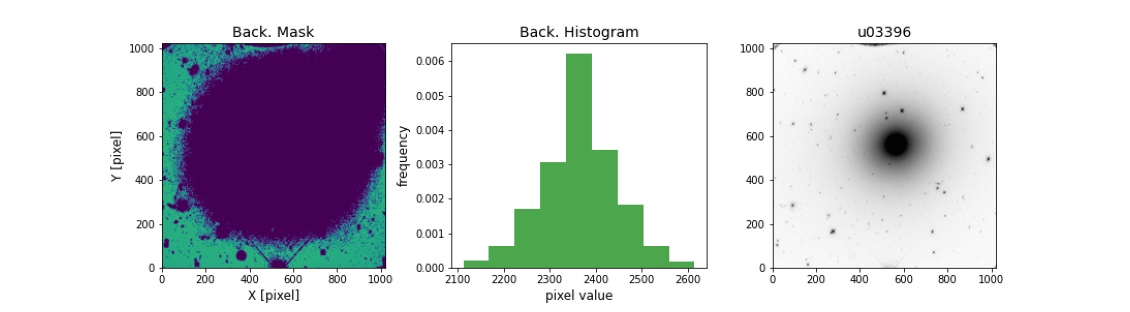

In [10]:
_, ax = plt.subplots(figsize=(20,10))
im = img.imread("Outputs_u03396/u03396_58b2aebb7ea6/u03396_initial_back.png")
ax.imshow(im)
plt.axis('off')

(-0.5, 1151.5, 287.5, -0.5)

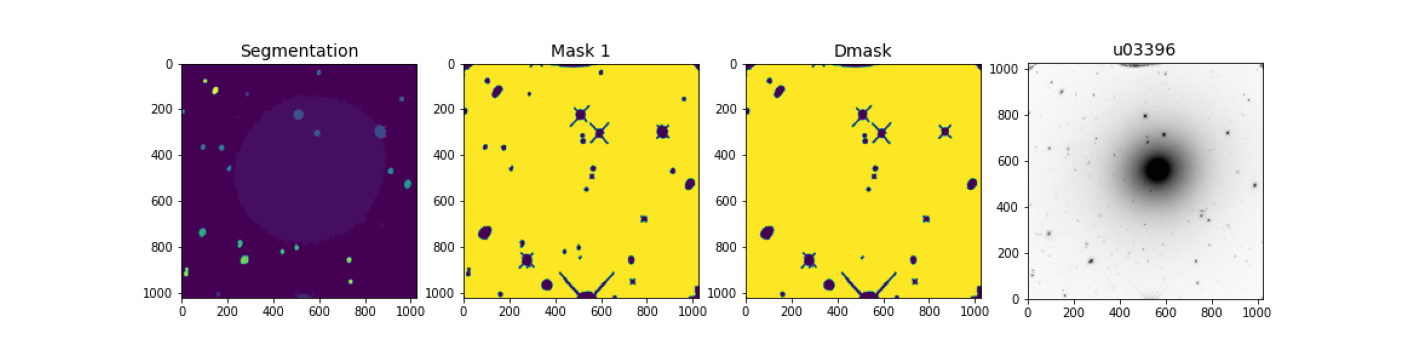

In [11]:
_, ax = plt.subplots(figsize=(25,10))
im = img.imread("Outputs_u03396/u03396_58b2aebb7ea6/u03396_initial_mask.png")
ax.imshow(im)
plt.axis('off')

(-0.5, 1151.5, 287.5, -0.5)

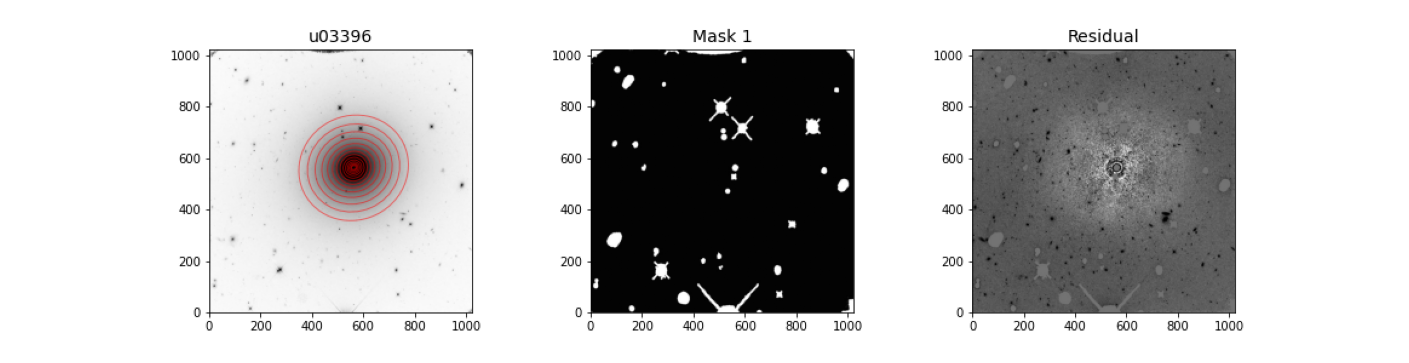

In [12]:
_, ax = plt.subplots(figsize=(25,10))
im = img.imread("Outputs_u03396/u03396_58b2aebb7ea6/u03396_basic_model.png")
ax.imshow(im)
plt.axis('off')

(-0.5, 935.5, 935.5, -0.5)

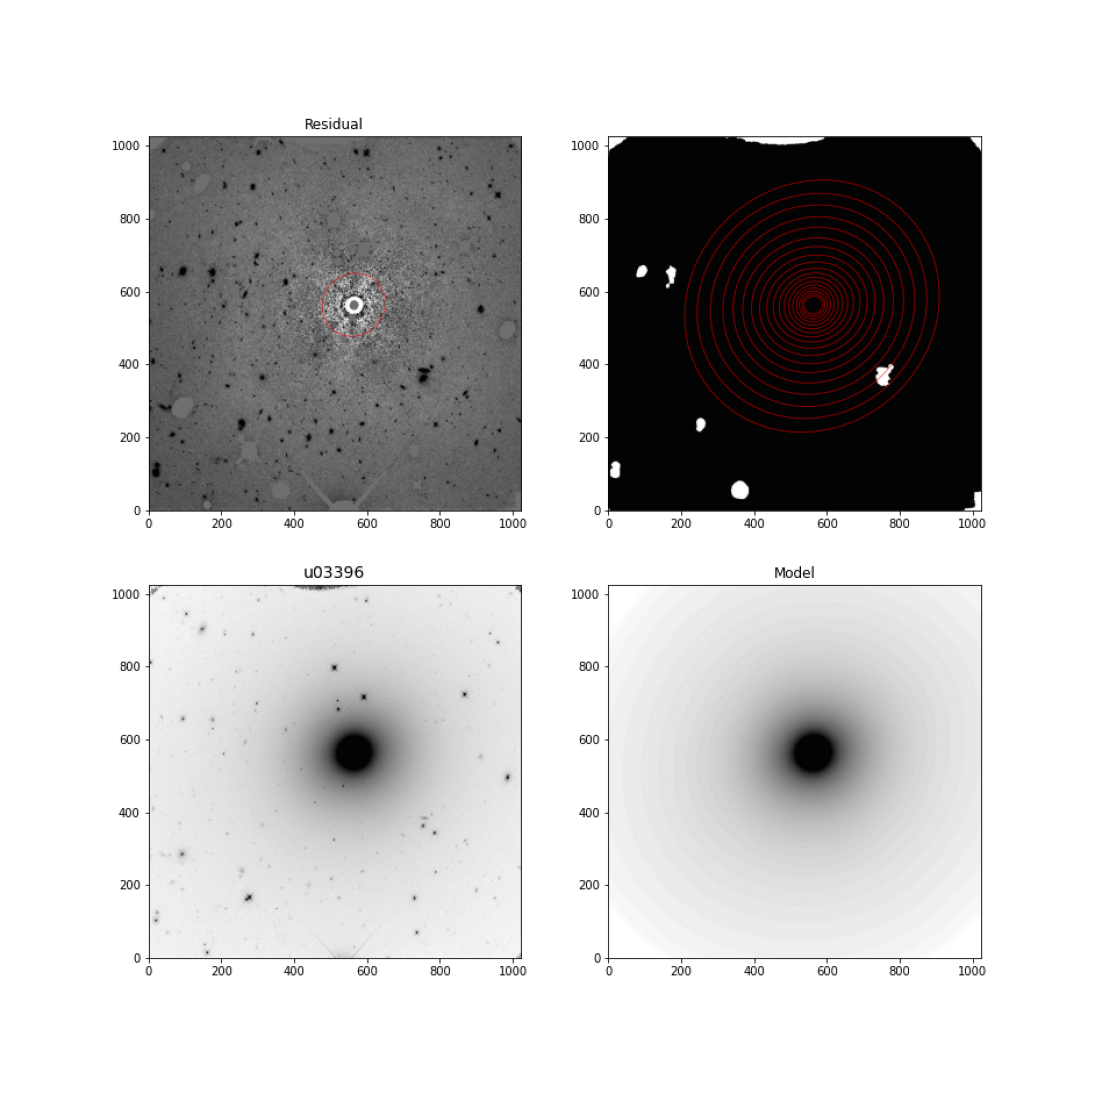

In [13]:
_, ax = plt.subplots(figsize=(20,20))
im = img.imread("Outputs_u03396/u03396_58b2aebb7ea6/u03396_initial_model.png")
ax.imshow(im)
plt.axis('off')

(-0.5, 359.5, 359.5, -0.5)

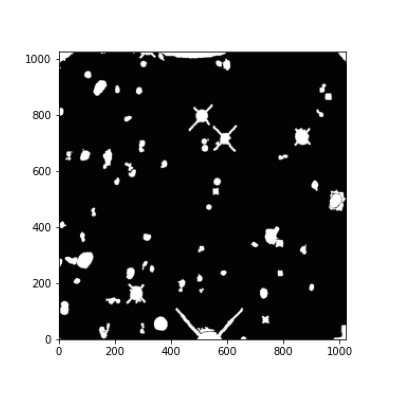

In [14]:
_, ax = plt.subplots(figsize=(7,7))

figName = objRoot+'/'+name+'_combined_mask.png'
im = img.imread(figName)
ax.imshow(im)
plt.axis('off')

(-0.5, 863.5, 359.5, -0.5)

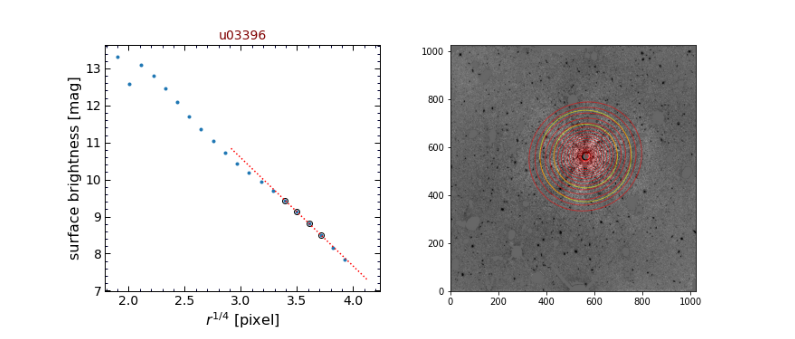

In [15]:
_, ax = plt.subplots(figsize=(14,7))

figName = objRoot+'/'+name+'_light_profile.png'
im = img.imread(figName)
ax.imshow(im)
plt.axis('off')

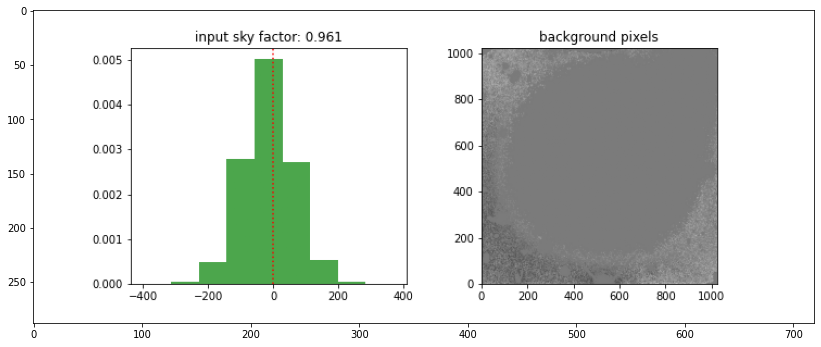

In [16]:
_, ax = plt.subplots(figsize=(14,7))

figName = objRoot+'/'+name+'_updated_back.png'
im = img.imread(figName)
ax.imshow(im)

    r0   r1  nr  n_cross  initial_sky_factor  final_sky_factor  model_no
0   12  357  29        1                0.92              0.93       999
1   11  250  22        1                0.85              0.96       998
2    9  270  29        1                0.90              0.96       997
3   13  282  22        3                0.78              0.95       996
4    9  271  19        2                0.78              0.95       995
5   13  236  17        2                0.91              0.96       994
6   11  391  38        3                0.84              0.90       993
7   14  386  31        1                0.77              0.84       992
8    8  269  22        3                0.92              0.95       991
9   14  230  15        0                0.89              0.96       990
10  11  323  28        0                0.85              0.94       989
11  13  238  20        1                0.82              0.96       988


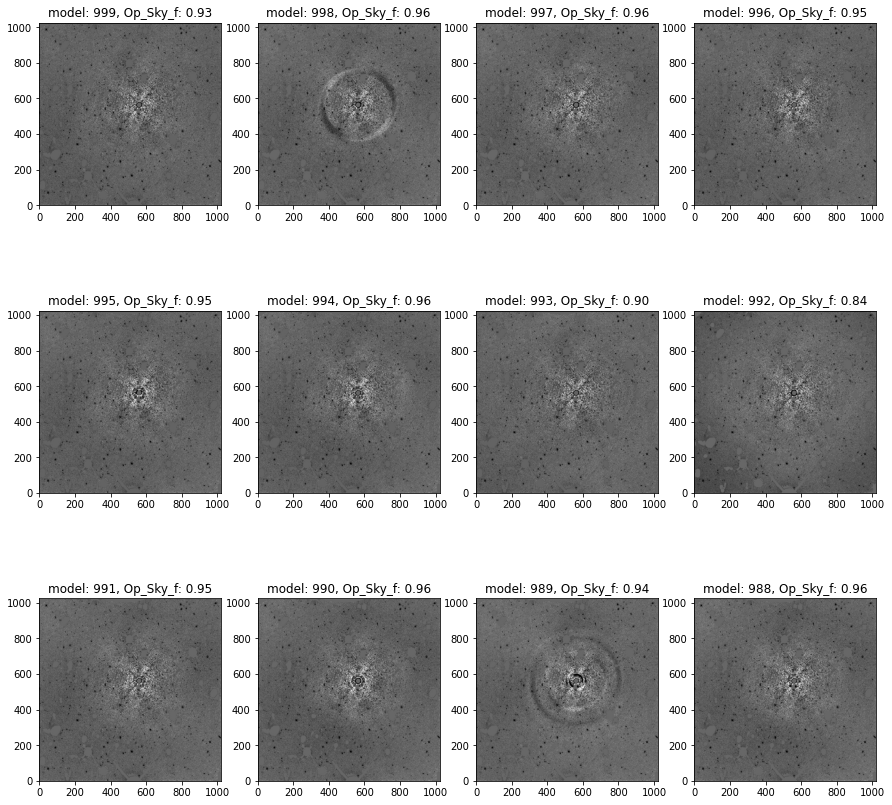

In [17]:
plot_scale = 'sqrt'    # 'log'
csv_name = objRoot+'/'+name+'_iterative_sky_optimizer.csv'

ncols = 4    # the number of panels in each row


if exists(csv_name):
    
    df = pd.read_csv(csv_name)
    for col in df.columns:
        df = df.rename(columns={col:col.strip()})
    
    n = len(df)
    nrows = n//ncols
    if n%ncols != 0: nrows += 1
    

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15)) 

    t = 0 
    for i in range(nrows):
        for j in range(ncols):
            
            if t>=n:
                continue

            ax = axes[i][j]
            model_no = df["model_no"][t]
            op_sky_f = df["final_sky_factor"][t]
            
            resid_file = objRoot+'/resid'+'.%03d'%model_no
            tv(fits_file=resid_file, ax=ax, options=plot_scale)
            
            ax.set_title("model: %d, Op_Sky_f: %.2f"%(model_no, op_sky_f))
                
            t+=1
    
    print(df[["r0", "r1", "nr", "n_cross", "initial_sky_factor", "final_sky_factor", "model_no"]])

In [18]:
df

,r0,r1,nr,n_cross,sky_median,initial_sky_factor,final_sky_factor,option,model_mask,model_no,object_root,residual_file,model_file,ellipse_file
0,12,357,29,1,2363.8,0.92,0.93,COS3X=0,0,999,Outputs_u03396/u03396_d343d60ea411/,resid.999,model.999,elliprof.999
1,11,250,22,1,2363.8,0.85,0.96,COS3X=0,999,998,Outputs_u03396/u03396_d343d60ea411/,resid.998,model.998,elliprof.998
2,9,270,29,1,2363.8,0.90,0.96,COS3X=0,998,997,Outputs_u03396/u03396_d343d60ea411/,resid.997,model.997,elliprof.997
3,13,282,22,3,2363.8,0.78,0.95,COS3X=0,997,996,Outputs_u03396/u03396_d343d60ea411/,resid.996,model.996,elliprof.996
4,9,271,19,2,2363.8,0.78,0.95,COS3X=0,996,995,Outputs_u03396/u03396_d343d60ea411/,resid.995,model.995,elliprof.995
5,13,236,17,2,2363.8,0.91,0.96,COS3X=0,995,994,Outputs_u03396/u03396_d343d60ea411/,resid.994,model.994,elliprof.994
6,11,391,38,3,2363.8,0.84,0.90,COS3X=0,994,993,Outputs_u03396/u03396_d343d60ea411/,resid.993,model.993,elliprof.993
7,14,386,31,1,2363.8,0.77,0.84,COS3X=0,993,992,Outputs_u03396/u03396_d343d60ea411/,resid.992,model.992,elliprof.992
8,8,269,22,3,2363.8,0.92,0.95,COS3X=0,992,991,Outputs_u03396/u03396_d343d60ea411/,resid.991,model.991,elliprof.991
9,14,230,15,0,2363.8,0.89,0.96,COS3X=0,991,990,Outputs_u03396/u03396_d343d60ea411/,resid.990,model.990,elliprof.990


In [19]:
## Internal parameters (sliders and setup)

params

{'backSextract': {'threshold': 0.03},
 'naiveSextract': {'minarea': 200.0, 'threshold': 3.0, 'smooth': 5.0},
 'basic_elliprof': {'r0': 9.0,
  'c_kron': 2.5,
  'sky_factor': 0.9,
  'k_ellipse': 15.0,
  'option': 'COS3X=0'},
 'second_elliprof': {'r0': 9.0,
  'c_kron': 2.5,
  'sky_factor': 0.9,
  'k_ellipse': 15.0,
  'option': 'COS3X=0',
  'minarea': 300.0,
  'threshold': 3.0,
  'smooth': 5.0,
  'renuc': 1.0}}